In [2]:
import numpy as np
a = np.array([1,3,5,7,9,9])
a_adjust = np.unique(a)
print(a_adjust)

[1 3 5 7 9]


In [3]:
import pandas as pd

a = pd.DataFrame([[1,3,5,7],[1,3,5,9],[1,3,5,7],[1,3,5,9]])
print(a)
a_adjust = a.drop_duplicates()
print(a_adjust)

   0  1  2  3
0  1  3  5  7
1  1  3  5  9
2  1  3  5  7
3  1  3  5  9
   0  1  2  3
0  1  3  5  7
1  1  3  5  9


In [4]:
friend_request = pd.DataFrame(
    {"requester_id":[101,102,103],
     "time": ["2017-06-09","2017-06-10","2017-06-11"],
     "sent_to_id":[301,302,303]}
)

friend_accepted = pd.DataFrame(
    {"requester_id":[103,102],
     "time":["2017-06-13","2017-06-10"],
     "accepter_id": [301,302]}
)
friend_request


,requester_id,sent_to_id,time
0,101,301,2017-06-09
1,102,302,2017-06-10
2,103,303,2017-06-11


In [5]:
friend_accepted

,accepter_id,requester_id,time
0,301,103,2017-06-13
1,302,102,2017-06-10


In [6]:
a = pd.merge(friend_request, friend_accepted, how="left", on="requester_id")
a

,requester_id,sent_to_id,time_x,accepter_id,time_y
0,101,301,2017-06-09,NaN,NaN
1,102,302,2017-06-10,302.0,2017-06-10
2,103,303,2017-06-11,301.0,2017-06-13


In [7]:
len(a["accepter_id"][a.accepter_id>0])/(len(a["requester_id"]))

0.6666666666666666

In [8]:
import pandas as pd

file_name = "orders_new.csv"
file_loc = "/Lola/Lola Study/Bittiger/2nd stage/week4/"

data = pd.read_csv(file_loc + file_name)
data.head(5)


,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,US,2017-04-02,12624549,6720123150182430132,49.99,3659561261588336546,ANDROID_APPS
1,US,2017-04-01,12624549,17511438899767627798,0.99,3659561261588336546,ANDROID_APPS
2,US,2017-04-04,12624549,1549342062436664018,39.99,3659561261588336546,ANDROID_APPS
3,US,2017-04-04,12624549,7771425263197855716,19.99,3659561261588336546,ANDROID_APPS
4,US,2017-04-01,12624549,17943210556580942992,19.99,3659561261588336546,ANDROID_APPS


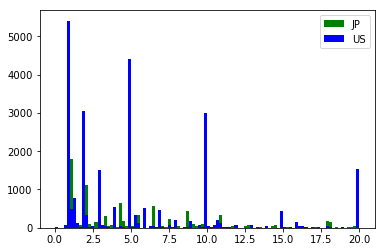

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

jp = data["spend_usd"][(data.spend_usd < 20) & (data.country == "JP")]
us = data["spend_usd"][(data.spend_usd < 20) & (data.country == "US")]

#plot
plot, ax = plt.subplots()
ax.hist(jp, bins = 100, color = "green", label = "JP")
ax.hist(us, bins = 100, color = "blue", label = "US")
ax.legend()

In [10]:
# deal with date format
data.date = pd.to_datetime(my_data.date, format='%Y-%m-%d')
data.date.head()

NameError: name 'my_data' is not defined

In [11]:
a = data.experiment_id.unique()
b = data.date.unique()
print(a)rint(index_series)

SyntaxError: invalid syntax (<ipython-input-11-c19d618b44a9>, line 3)

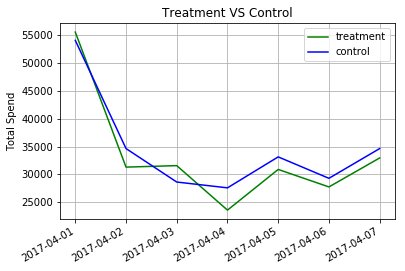

In [13]:
# deal with date format
data.date = pd.to_datetime(data.date, format='%Y-%m-%d')
data.date.head()
#very important


#function1
def Get(df, id):
    table = df[["date","spend_usd"]][df.experiment_id == id]
    series = table.groupby("date")["spend_usd"].sum()
    return(series)

#function2
def Plot(a,b):
    fig, ax = plt.subplots()
    ax.plot(a, color = "green", label = "treatment")
    ax.plot(b, color = "blue", label = "control")
    ax.set_title("Treatment VS Control")
    ax.set_ylabel("Total Spend")
    ax.grid(True, which = "both")
    #blank spaces influence? NO
    ax.legend()
    plt.gcf().autofmt_xdate()
    
#function3
def Print(df, experiment_id):
#    index = np.unique(df.date)
#   index = np.sort(index)
    
#     df_adjust = df.sort_values("date", ascending=False, inplace=False)
    df_adjust = df
    #how to decending?
    treatment = Get(df_adjust, experiment_id[0])
    control = Get(df_adjust, experiment_id[1])
    Plot(treatment, control)
    
Print(data, [12624548,12624549])

Cumulative Impact (treatment to control):-2.46850453816%


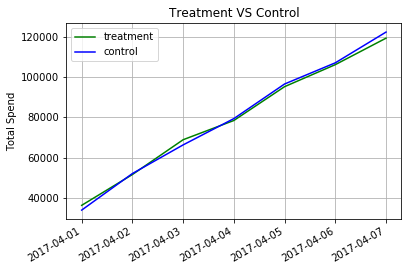

In [50]:
#cumulative results


#function1
def Getcul(df, id, country):
    table = df[["date","spend_usd"]][(df.experiment_id == id) &(df.country == country)]
    series = table.groupby("date")["spend_usd"].sum()
    series =np.cumsum(series)
    total_revenue = series[-1]
    return((series, total_revenue))

#function2
def Plotcul(a,b):
    fig, ax = plt.subplots()
    ax.plot(a, color = "green", label = "treatment")
    ax.plot(b, color = "blue", label = "control")
    ax.set_title("Treatment VS Control")
    ax.set_ylabel("Total Spend")
    ax.grid(True, which = "both")
    #blank spaces influence? NO
    ax.legend()
    plt.gcf().autofmt_xdate()
    
#function3
def Printcul(df, experiment_id, country):
#    index = np.unique(df.date)
#   index = np.sort(index)
    
    df = df.sort_values("date", ascending = True, inplace=False)
    
    treatment = Getcul(df, experiment_id[0], country)[0]
    control = Getcul(df, experiment_id[1], country)[0]
    treatment_rev = Getcul(df, experiment_id[0], country)[-1]
    control_rev = Getcul(df, experiment_id[1], country)[-1]
    
    print("Cumulative Impact (treatment to control):" + str(treatment_rev/control_rev*100-100)+ "%")
    Plotcul(treatment, control)
    
Printcul(data, [12624548,12624549], "JP")
